## Project Title  
Climate Risk Guide: Predictive Platform for Heatwave and Flood Hazards

### Problem Statement  
Climate change has intensified the frequency and severity of extreme weather events, particularly heatwaves and floods,which pose significant threats
to human health, infrastructure, agriculture, and the overall resilience of communities. Despite the availability of large climate datasets, many 
regions lack accessible and actionable platforms that can translate this data into predictive risk insights for decision-making.

### Description 
The project “Climate Risk Guide: Predictive Platform for Heatwave and Flood Hazards” aims to develop a data-driven system that uses machine learning
models trained on historical climate datasets to predict and assess the risks of heatwaves and floods. Instead of merging the datasets, separate models 
will be built for each hazard—heatwaves using temperature-based datasets and floods using rainfall and flood records—and their results will be combined
in a unified platform. This platform will provide early warnings, hazard severity estimates, and actionable insights, helping policymakers, planners,
andcommunities enhance preparedness and resilience against climate-induced disasters.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [21]:
#Load the Flood_dataset
df1 = pd.read_csv("flood.csv.zip")
print(df1.head(), "\n")

   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  

In [101]:
# Basic info
print(df1.info())
print(df1.describe())
print(df1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [98]:
# Rows and Cols
df1.shape

(50000, 21)

In [68]:
# Cols
df1.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

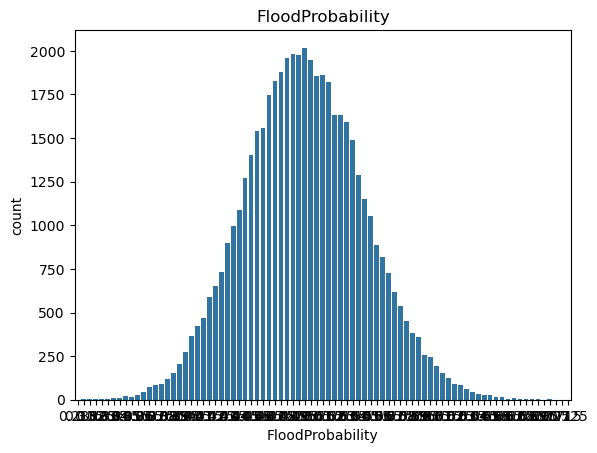

In [70]:
# Univariate Analysis
sns.countplot(x='FloodProbability', data=df1)
plt.title('FloodProbability')
plt.show()

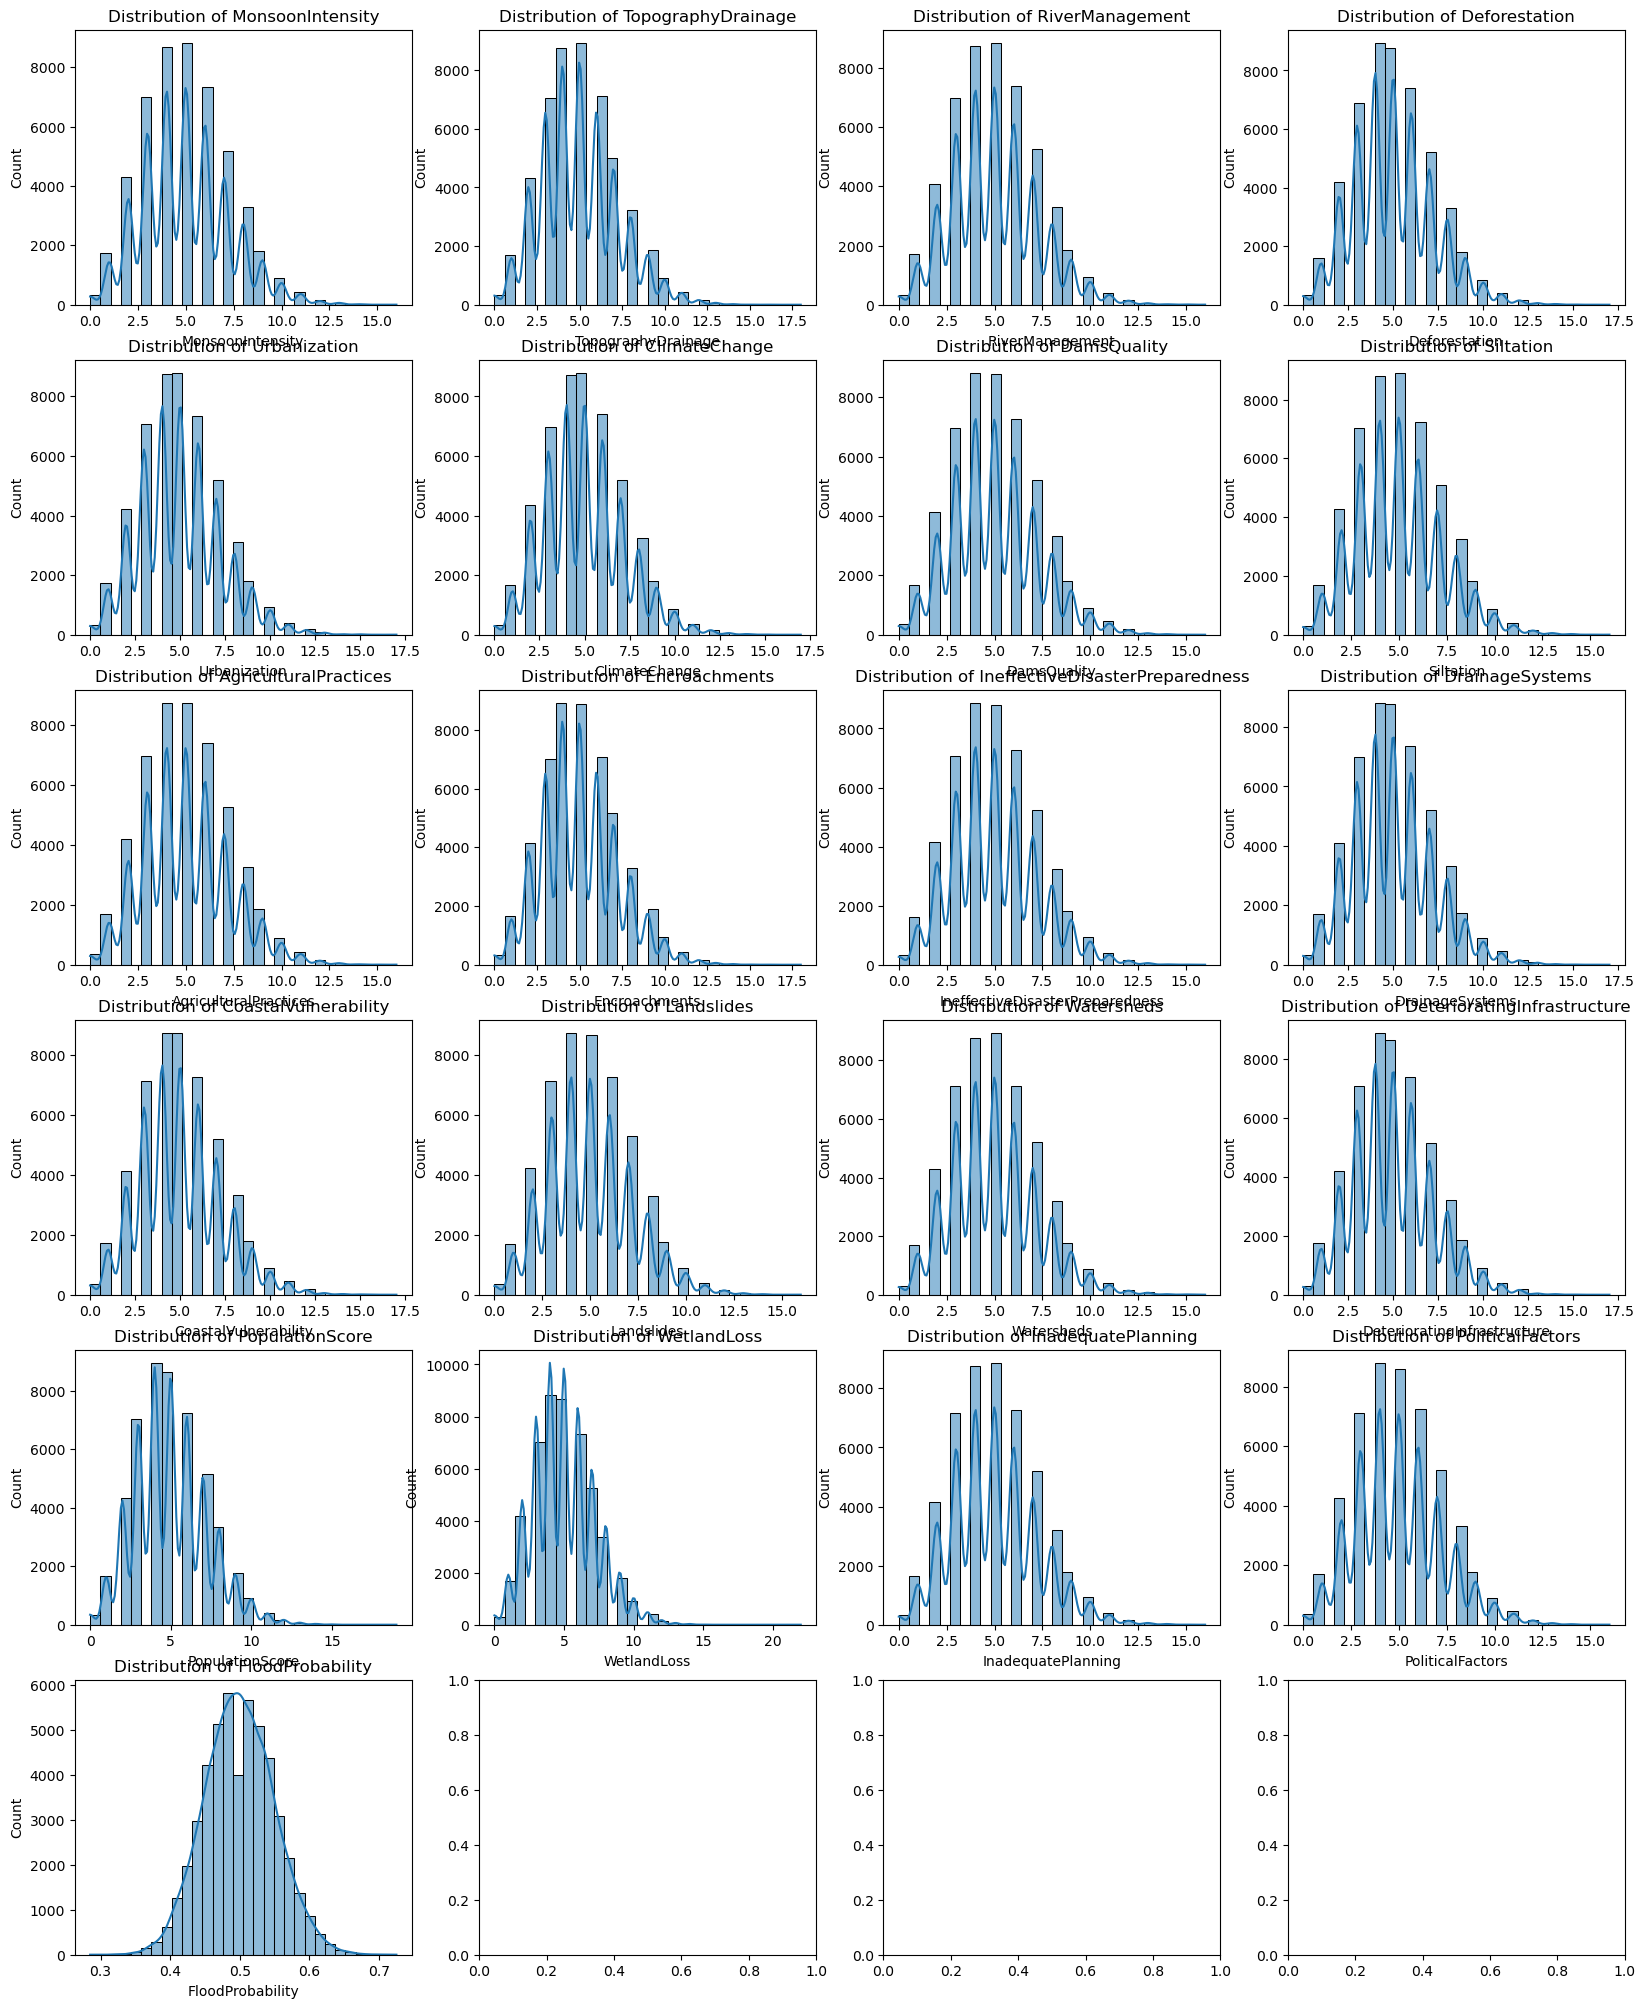

In [27]:
# Univariate Analysis for num_cols
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(num_cols)//4 + 1, ncols=4, figsize=(20, 25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df1[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f"Distribution of {col}")

In [72]:
# Hide extra subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

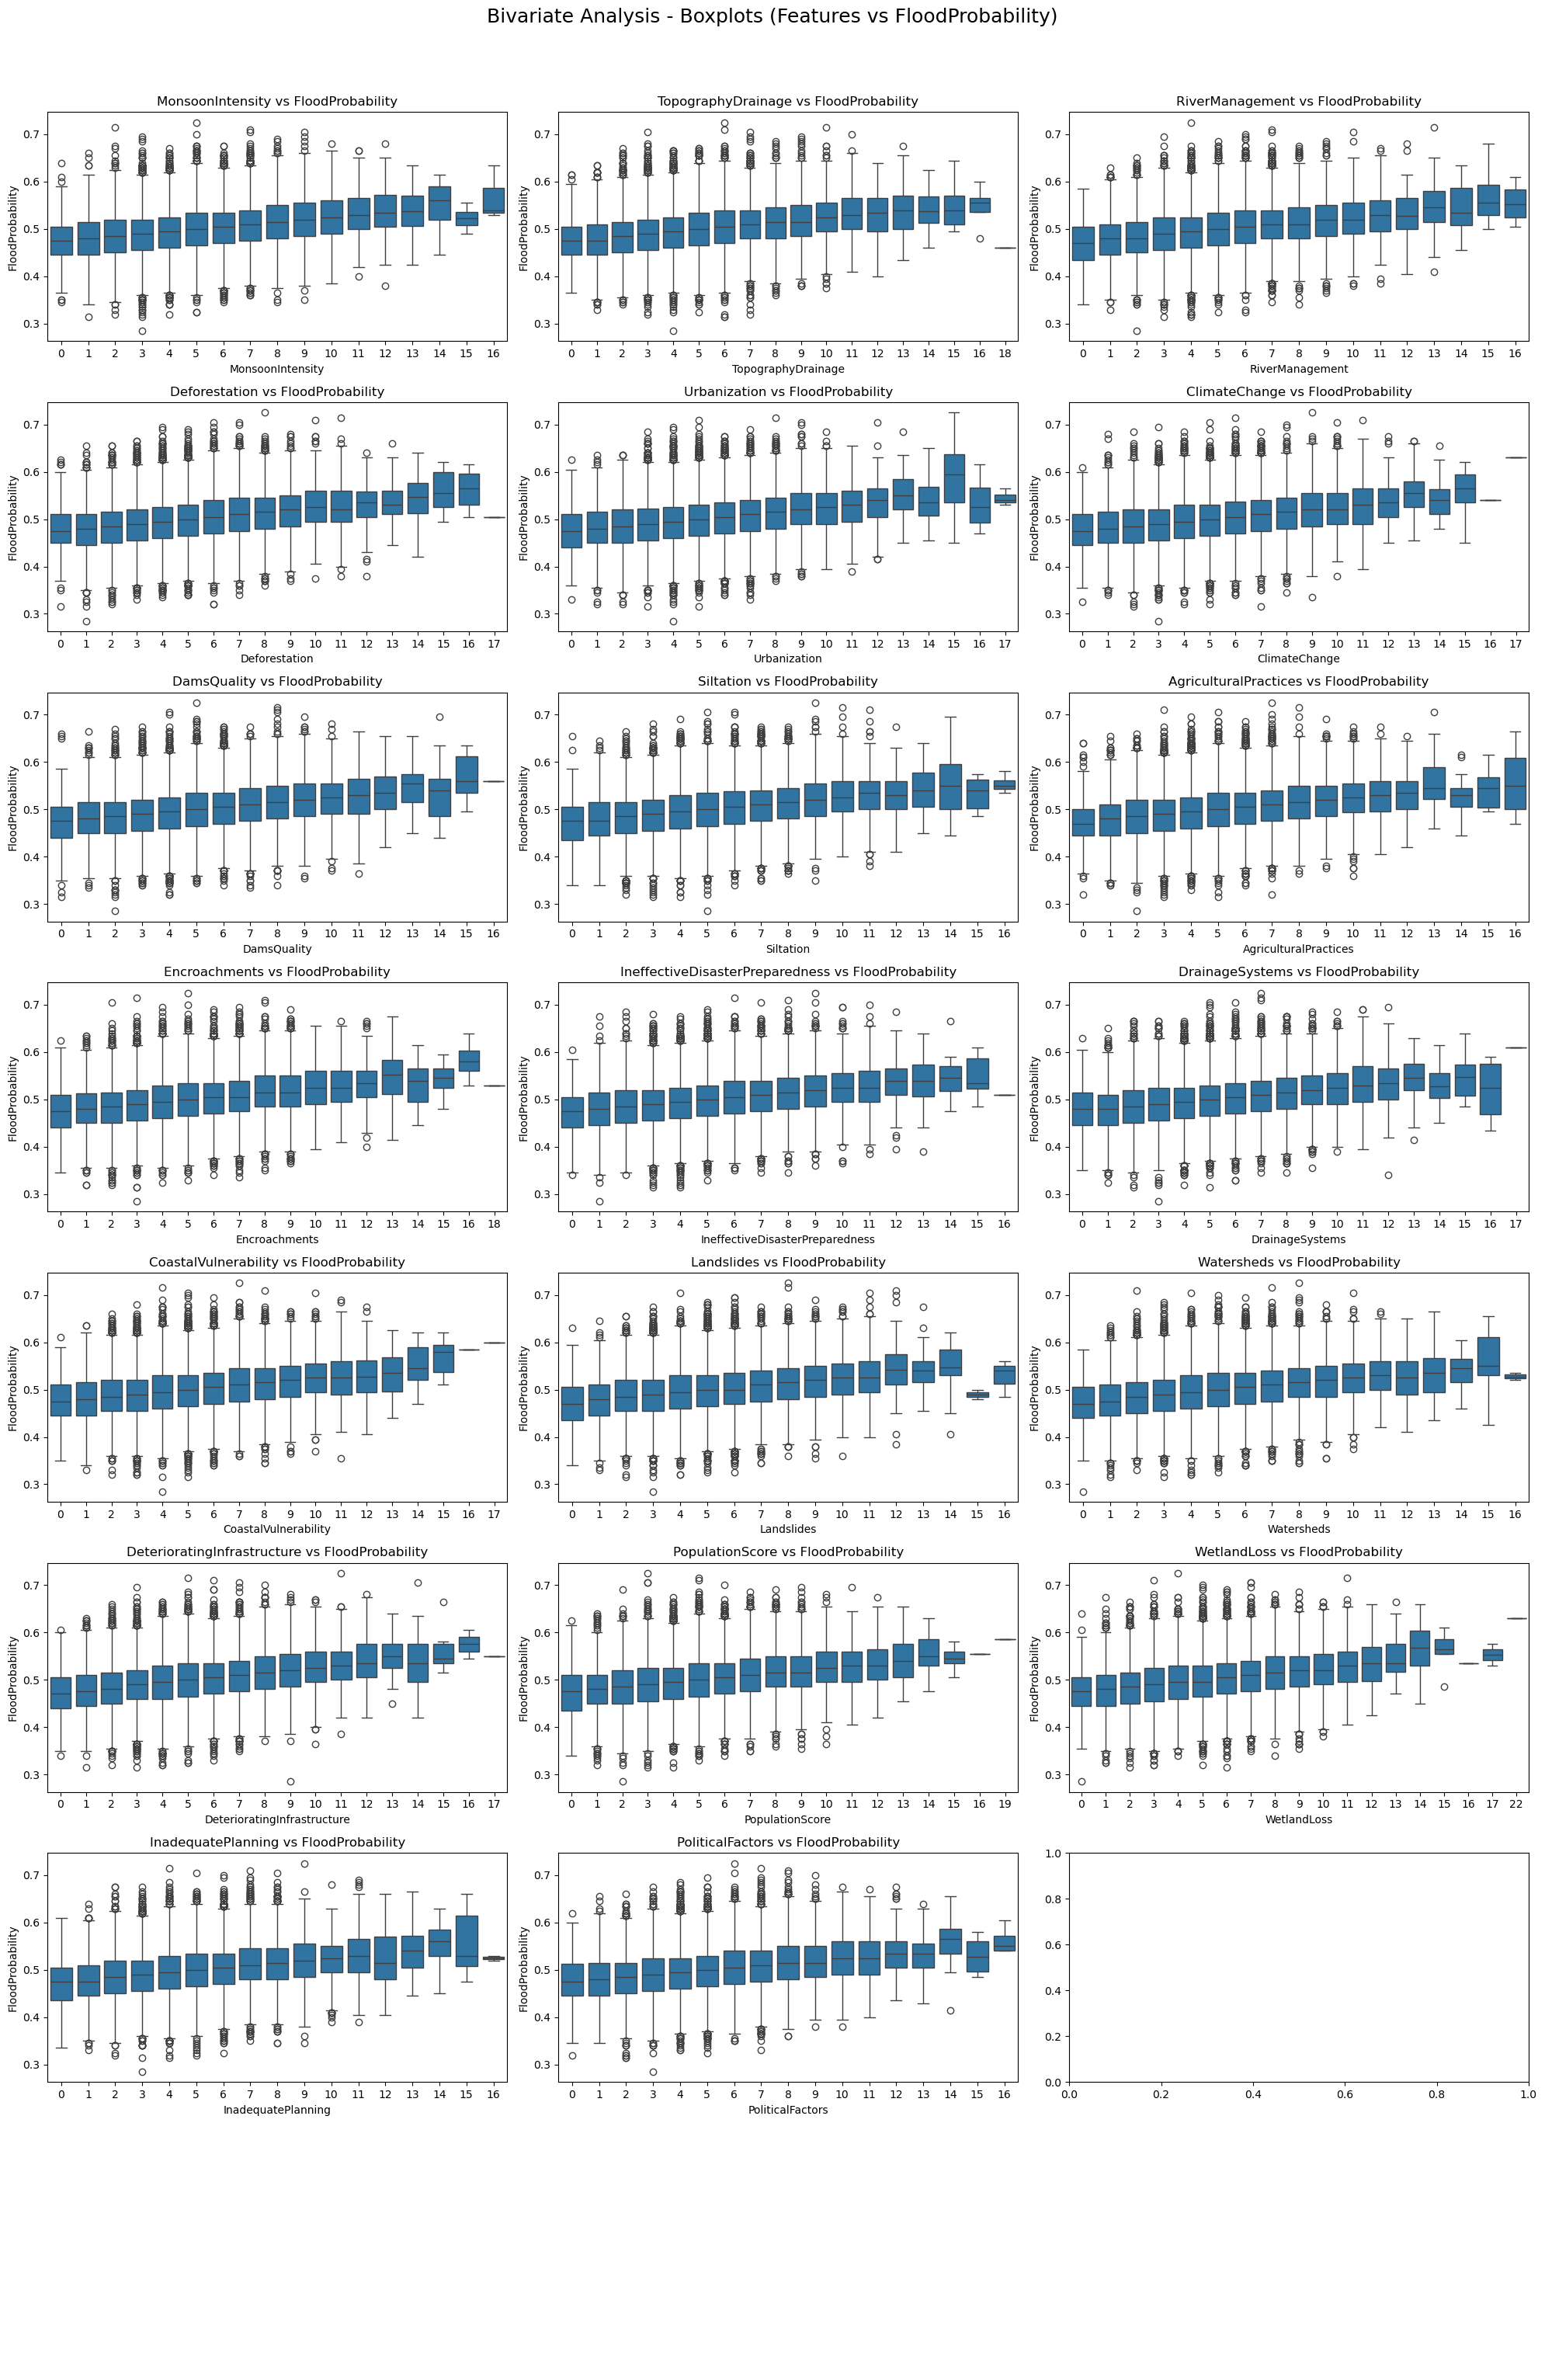

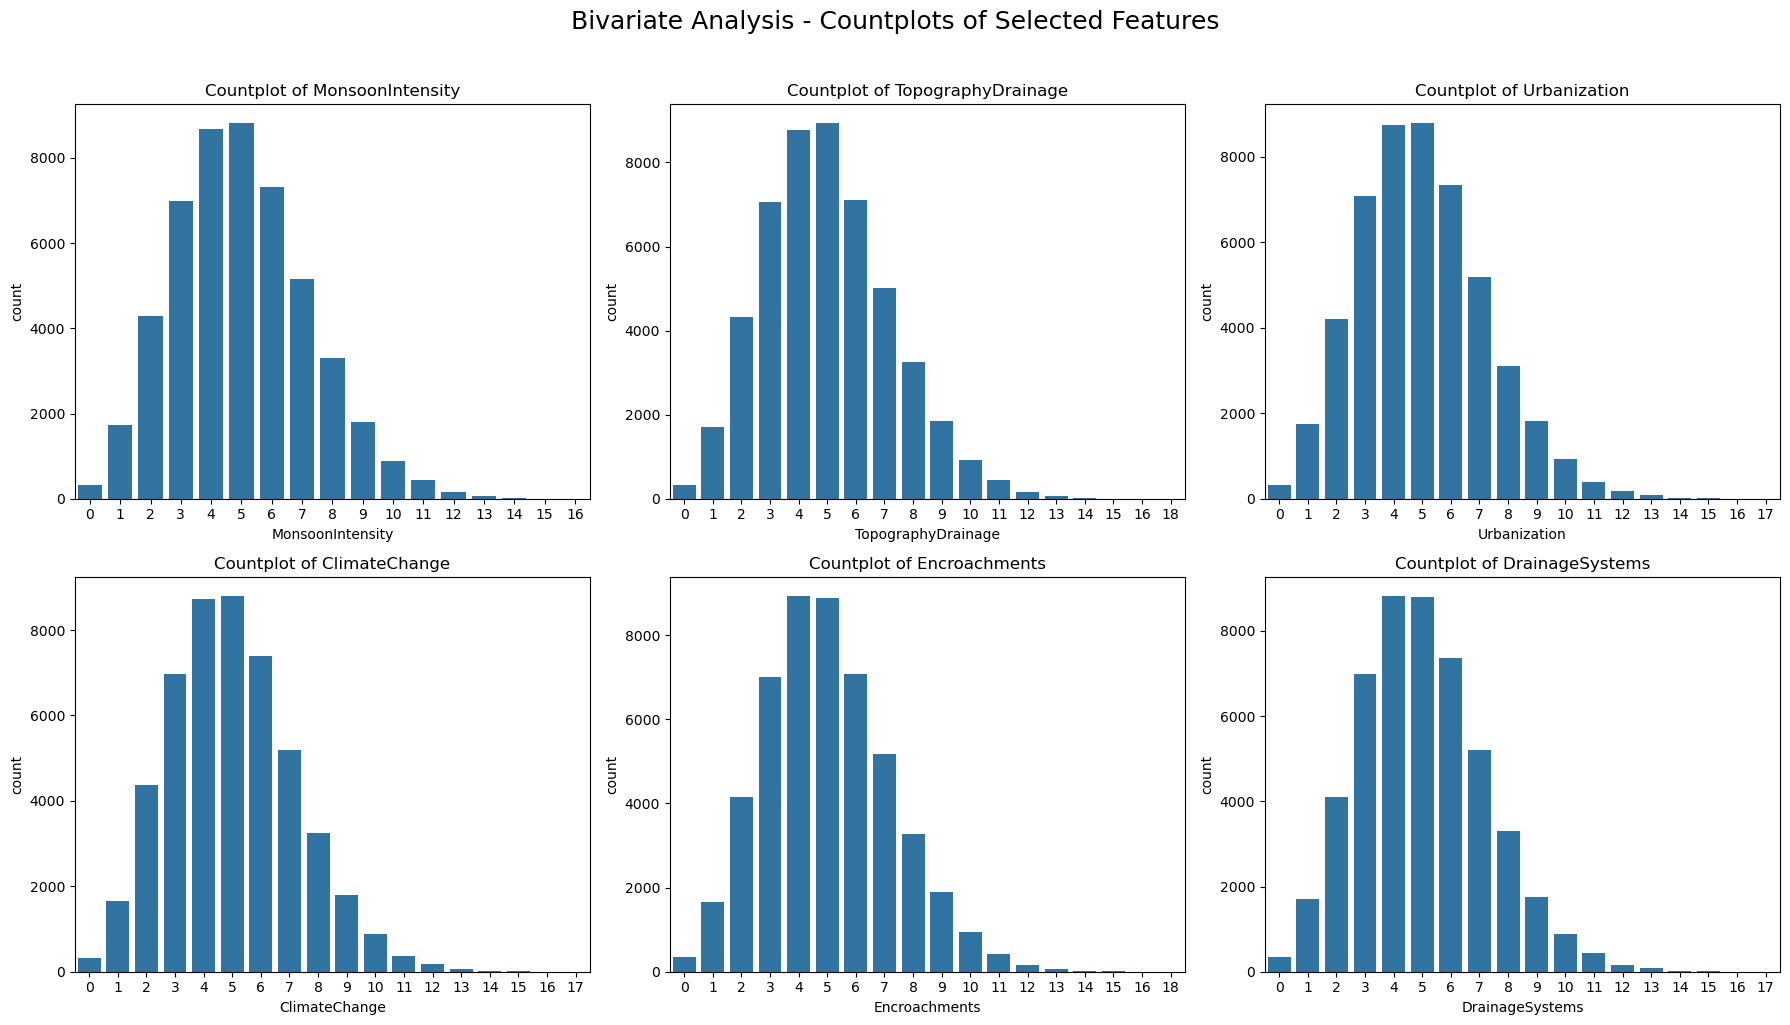

In [75]:

# Bivariate Analysis (Boxplots + Countplots)

import matplotlib.pyplot as plt
import seaborn as sns

target = "FloodProbability"
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

# --- Boxplots ---
fig, axes = plt.subplots(nrows=len(num_cols)//3 + 1, ncols=3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    if col != target:  # skip target column
        sns.boxplot(x=df1[col], y=df1[target], ax=axes[i])
        axes[i].set_title(f"{col} vs {target}")

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Bivariate Analysis - Boxplots (Features vs FloodProbability)", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# --- Countplots (for selected features) ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

selected_cols = ["MonsoonIntensity", "TopographyDrainage", "Urbanization", 
                 "ClimateChange", "Encroachments", "DrainageSystems"]

for i, col in enumerate(selected_cols):
    sns.countplot(x=df1[col], ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")

fig.suptitle("Bivariate Analysis - Countplots of Selected Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


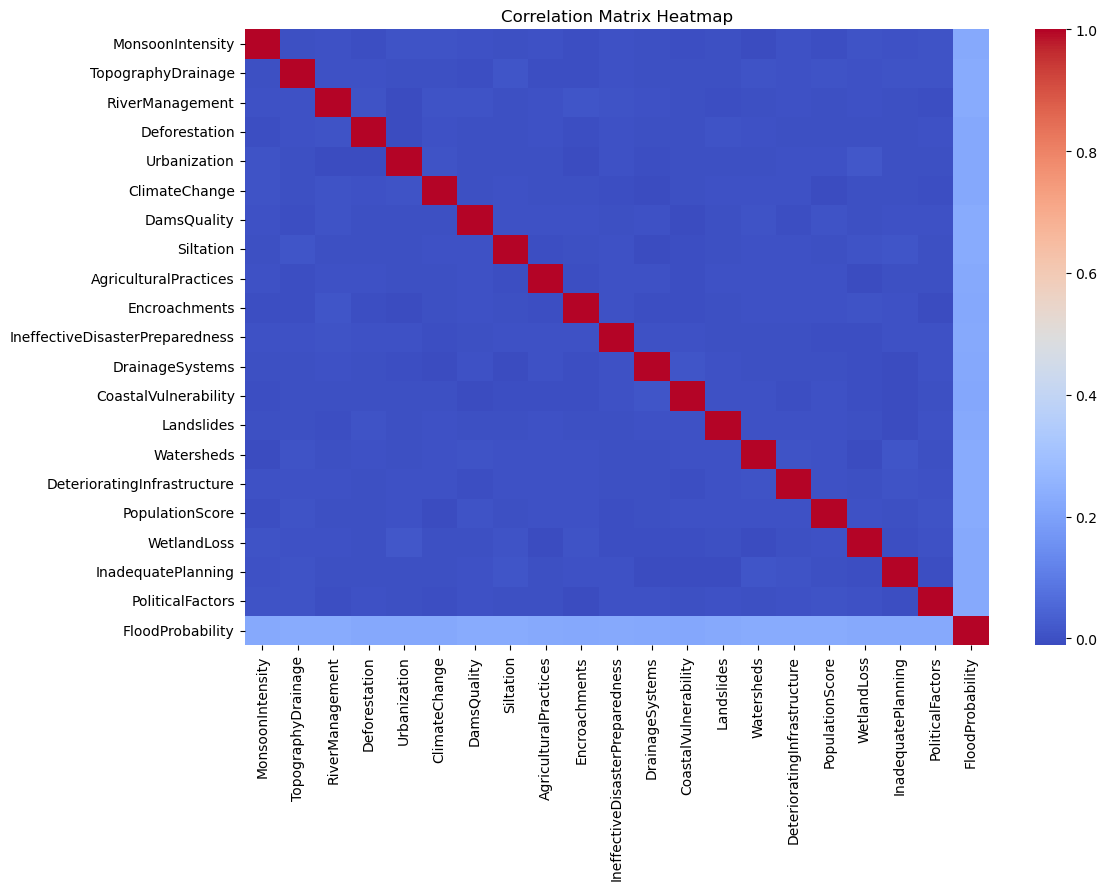

In [76]:
# Correlation

plt.figure(figsize=(12, 8))
corr_matrix = df1[num_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


Top correlated features: ['DeterioratingInfrastructure', 'TopographyDrainage', 'RiverManagement', 'Watersheds', 'DamsQuality']


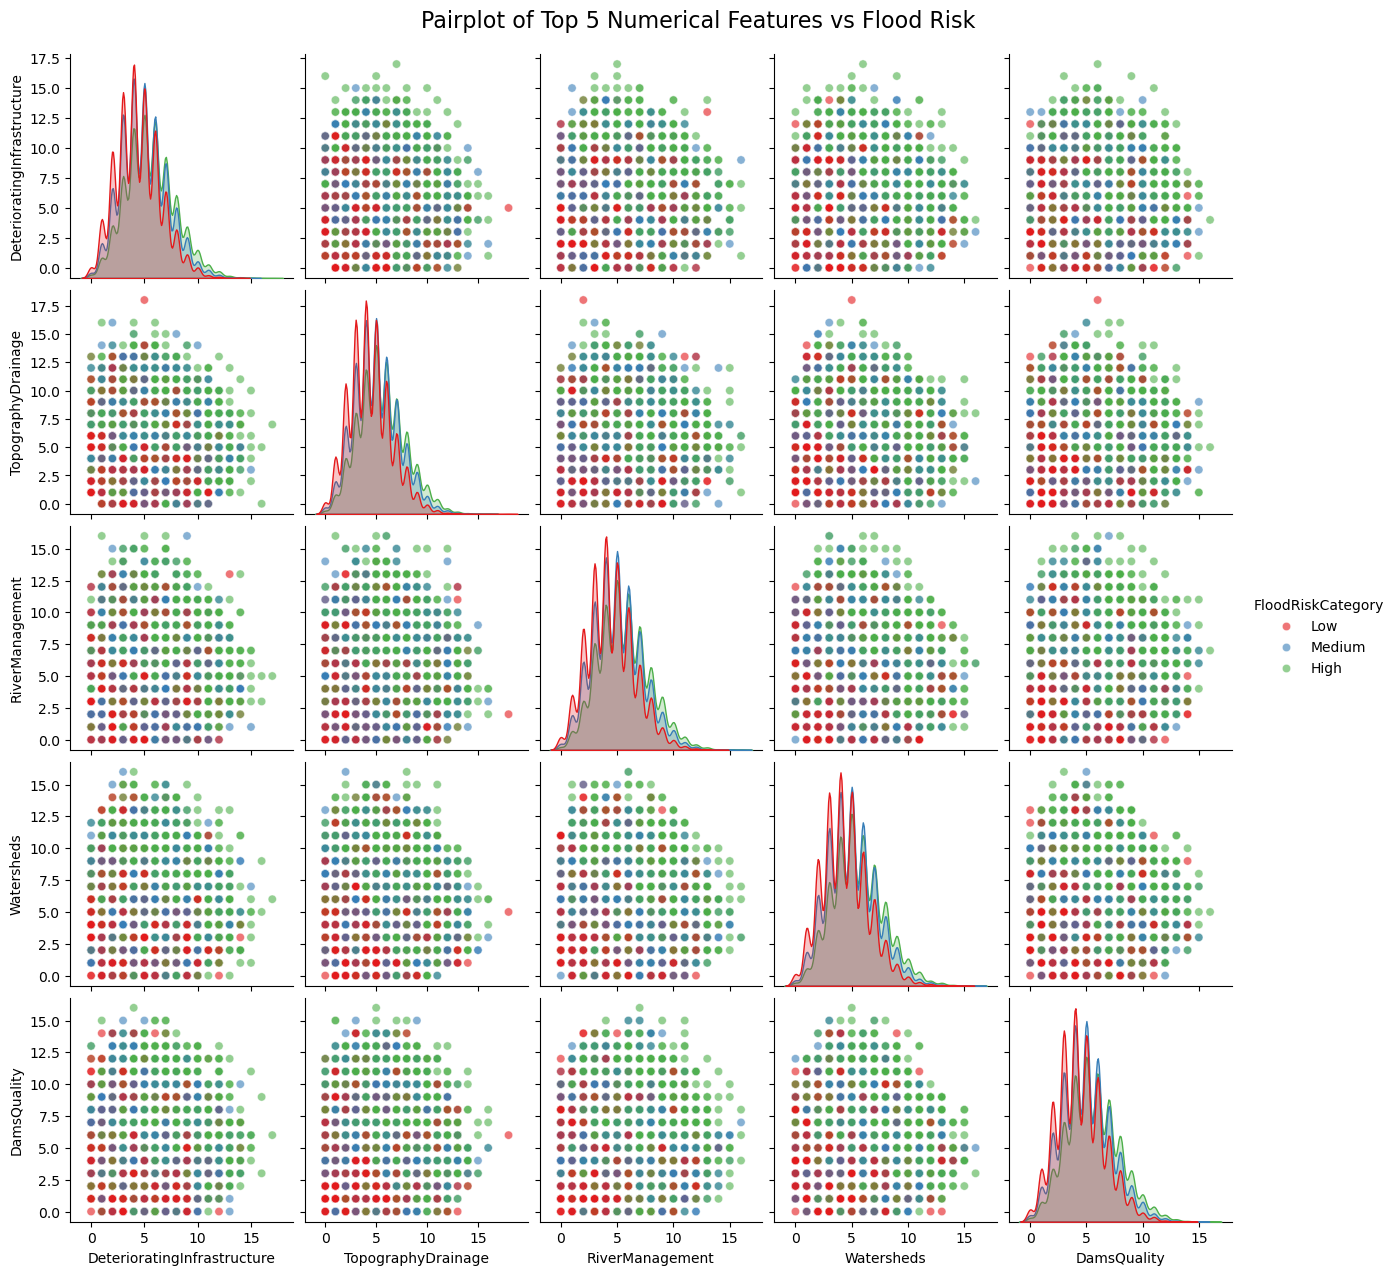

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
df1 = pd.read_csv("flood.csv.zip")   # <-- make sure this path is correct


# 2. Create flood risk categories
df1["FloodRiskCategory"] = pd.qcut(
    df1["FloodProbability"], 
    q=3, 
    labels=["Low", "Medium", "High"]
)


# 3. Find top correlated features
num_cols = df1.select_dtypes(include=['int64', 'float64']).columns

top_features = (
    df1[num_cols].corr()["FloodProbability"]
    .abs()
    .sort_values(ascending=False)
    .index[1:6]   # skip FloodProbability itself
    .tolist()
)
print("Top correlated features:", top_features)


# 4. Pairplot
g = sns.pairplot(
    df1[top_features + ["FloodRiskCategory"]],
    hue="FloodRiskCategory",
    diag_kind="kde",
    palette="Set1",
    plot_kws={"alpha": 0.6}
)
g.fig.suptitle("Pairplot of Top 5 Numerical Features vs Flood Risk", fontsize=16, y=1.02)
plt.show()


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 9.1 MB/s eta 0:00:00

📊 Model Performance:
MSE : 0.0007
RMSE: 0.0258
R²  : 0.7335

🔥 Top 10 Features:
                             Feature  Importance
1                TopographyDrainage    0.052860
6                       DamsQuality    0.052757
19                 PoliticalFactors    0.052507
16                  PopulationScore    0.051877
2                   RiverManagement    0.051485
10  IneffectiveDisasterPreparedness    0.051459
15      DeterioratingInfrastructure    0.050883
8             AgriculturalPractices    0.050845
13                       Landslides    0.050757
14                       Watersheds    0.050444


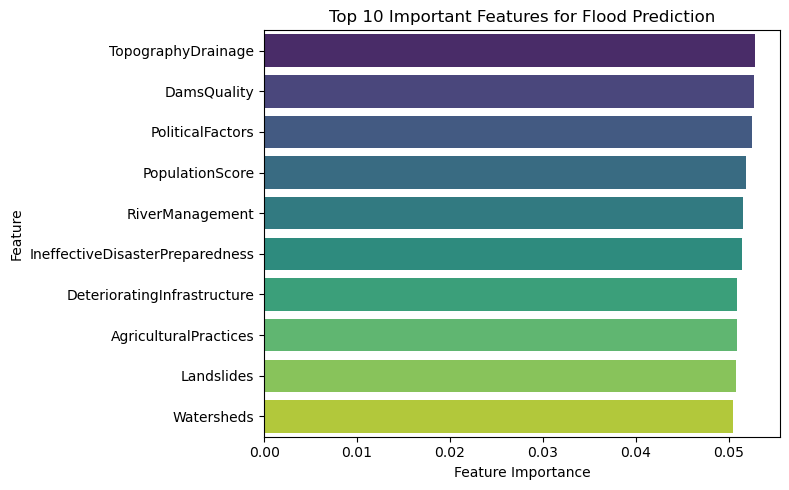


🎯 Example Predictions (first 10):
   Actual  Predicted
0   0.455   0.467975
1   0.495   0.501850
2   0.470   0.486300
3   0.460   0.468475
4   0.465   0.483125
5   0.535   0.510875
6   0.490   0.501875
7   0.480   0.499400
8   0.605   0.542425
9   0.490   0.495075


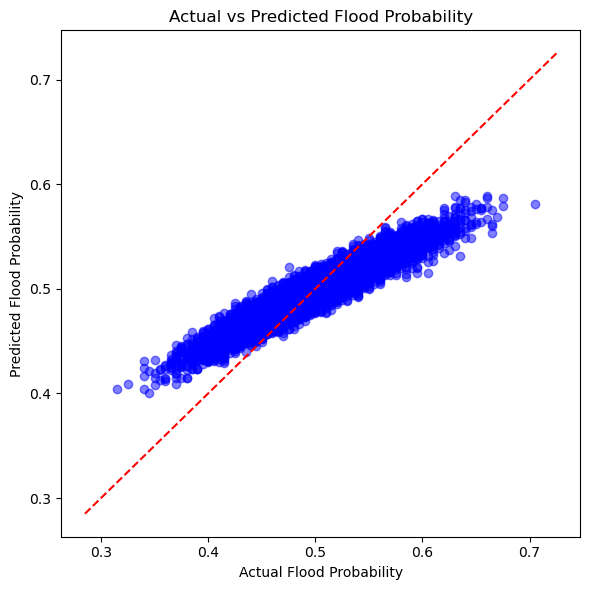

In [ ]:
# Install SHAP (only run once per Jupyter environment)
!pip install shap

# ------------------- IMPORTS -------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap

# Make plots inline in Jupyter
%matplotlib inline

# ------------------- 1. Load dataset -------------------
df = pd.read_csv("flood.csv.zip")

# ------------------- 2. Convert boolean → int -------------------
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

# ------------------- 3. Split features/target -------------------
target = "FloodProbability"
X = df.drop(columns=[target])
y = df[target]

# ------------------- 4. Train-test split -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------- 5. Scale numerical features -------------------
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols].astype(float))
X_test[num_cols] = scaler.transform(X_test[num_cols].astype(float))

# ------------------- 6. Train model -------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# ------------------- 7. Evaluate -------------------
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print("MSE :", round(mse, 4))
print("RMSE:", round(rmse, 4))
print("R²  :", round(r2, 4))

# ------------------- 8. Feature importance -------------------
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🔥 Top 10 Features:\n", importances.head(10))

# --- PLOT FEATURE IMPORTANCES ---
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=importances.head(10), 
    hue="Feature", 
    palette="viridis", 
    legend=False
)
plt.title("Top 10 Important Features for Flood Prediction")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ------------------- 9. Predictions (sample) -------------------
results_df = pd.DataFrame({"Actual": y_test[:20].values, "Predicted": y_pred[:20]})
print("\n🎯 Example Predictions (first 10):")
print(results_df.head(10))

# --- PLOT ACTUAL vs PREDICTED ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")  # ideal line
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Actual vs Predicted Flood Probability")
plt.tight_layout()
plt.show()

# ------------------- 10. SHAP FEATURE IMPORTANCE -------------------
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot (bar chart)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Detailed Summary Plot (beeswarm)
shap.summary_plot(shap_values, X_test)


#  Weather_dataset => Heatwaves

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import joblib

In [22]:
# Load the Weather_dataset
df2 = pd.read_csv("india_weather_data.csv.zip")
print(df2.head())

                  date  latitude  longitude  wind_speed  cloud_cover  \
0  2023-01-01 00:00:00   28.6139    77.2090    0.428064    56.787047   
1  2023-01-01 00:00:00   19.0760    72.8777   13.603933    36.321945   
2  2023-01-01 00:00:00   12.9716    77.5946  100.000000    49.585297   
3  2023-01-01 00:00:00   22.5726    88.3639    2.785259    21.462155   
4  2023-01-01 00:00:00       NaN    80.2707    9.399230          NaN   

   precipitation_probability  pressure_surface_level  dew_point  uv_index  \
0                  89.803147             1003.885666  29.282458  6.353398   
1                  75.198203              500.000000        NaN  6.653509   
2                  60.621663             1001.774831  31.567394  5.976996   
3                  38.284893              993.455514  29.974869  7.757285   
4                  21.538080             1020.945313  25.815398  3.376130   

   heatwave  visibility   rainfall  solar_radiation  snowfall  \
0       0.0    0.827196  34.565602     

In [24]:
# Basic info
print(df2.info())
print(df2.describe())
print(df2.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       118202 non-null  object 
 1   latitude                   117910 non-null  float64
 2   longitude                  117768 non-null  float64
 3   wind_speed                 117886 non-null  float64
 4   cloud_cover                118072 non-null  float64
 5   precipitation_probability  117821 non-null  float64
 6   pressure_surface_level     117806 non-null  float64
 7   dew_point                  118175 non-null  float64
 8   uv_index                   117737 non-null  float64
 9   heatwave                   117855 non-null  float64
 10  visibility                 117974 non-null  float64
 11  rainfall                   118006 non-null  float64
 12  solar_radiation            118059 non-null  float64
 13  snowfall                   11

In [26]:
# Rows and Cols
df2.shape


(131055, 18)

In [28]:
# cols
df2.columns

Index(['date', 'latitude', 'longitude', 'wind_speed', 'cloud_cover',
       'precipitation_probability', 'pressure_surface_level', 'dew_point',
       'uv_index', 'heatwave', 'visibility', 'rainfall', 'solar_radiation',
       'snowfall', 'max_temperature', 'min_temperature', 'max_humidity',
       'min_humidity'],
      dtype='object')

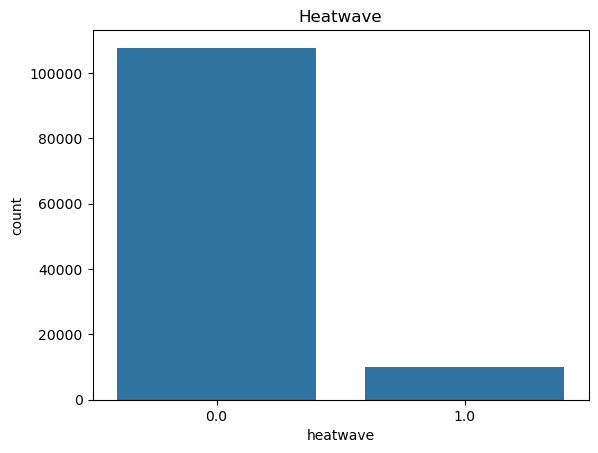

In [30]:
#Univariate Analysis
sns.countplot(x='heatwave', data=df2)
plt.title('Heatwave')
plt.show()

Numeric columns: ['latitude', 'longitude', 'wind_speed', 'cloud_cover', 'precipitation_probability', 'pressure_surface_level', 'dew_point', 'uv_index', 'heatwave', 'visibility', 'rainfall', 'solar_radiation', 'snowfall', 'max_temperature', 'min_temperature', 'max_humidity', 'min_humidity']


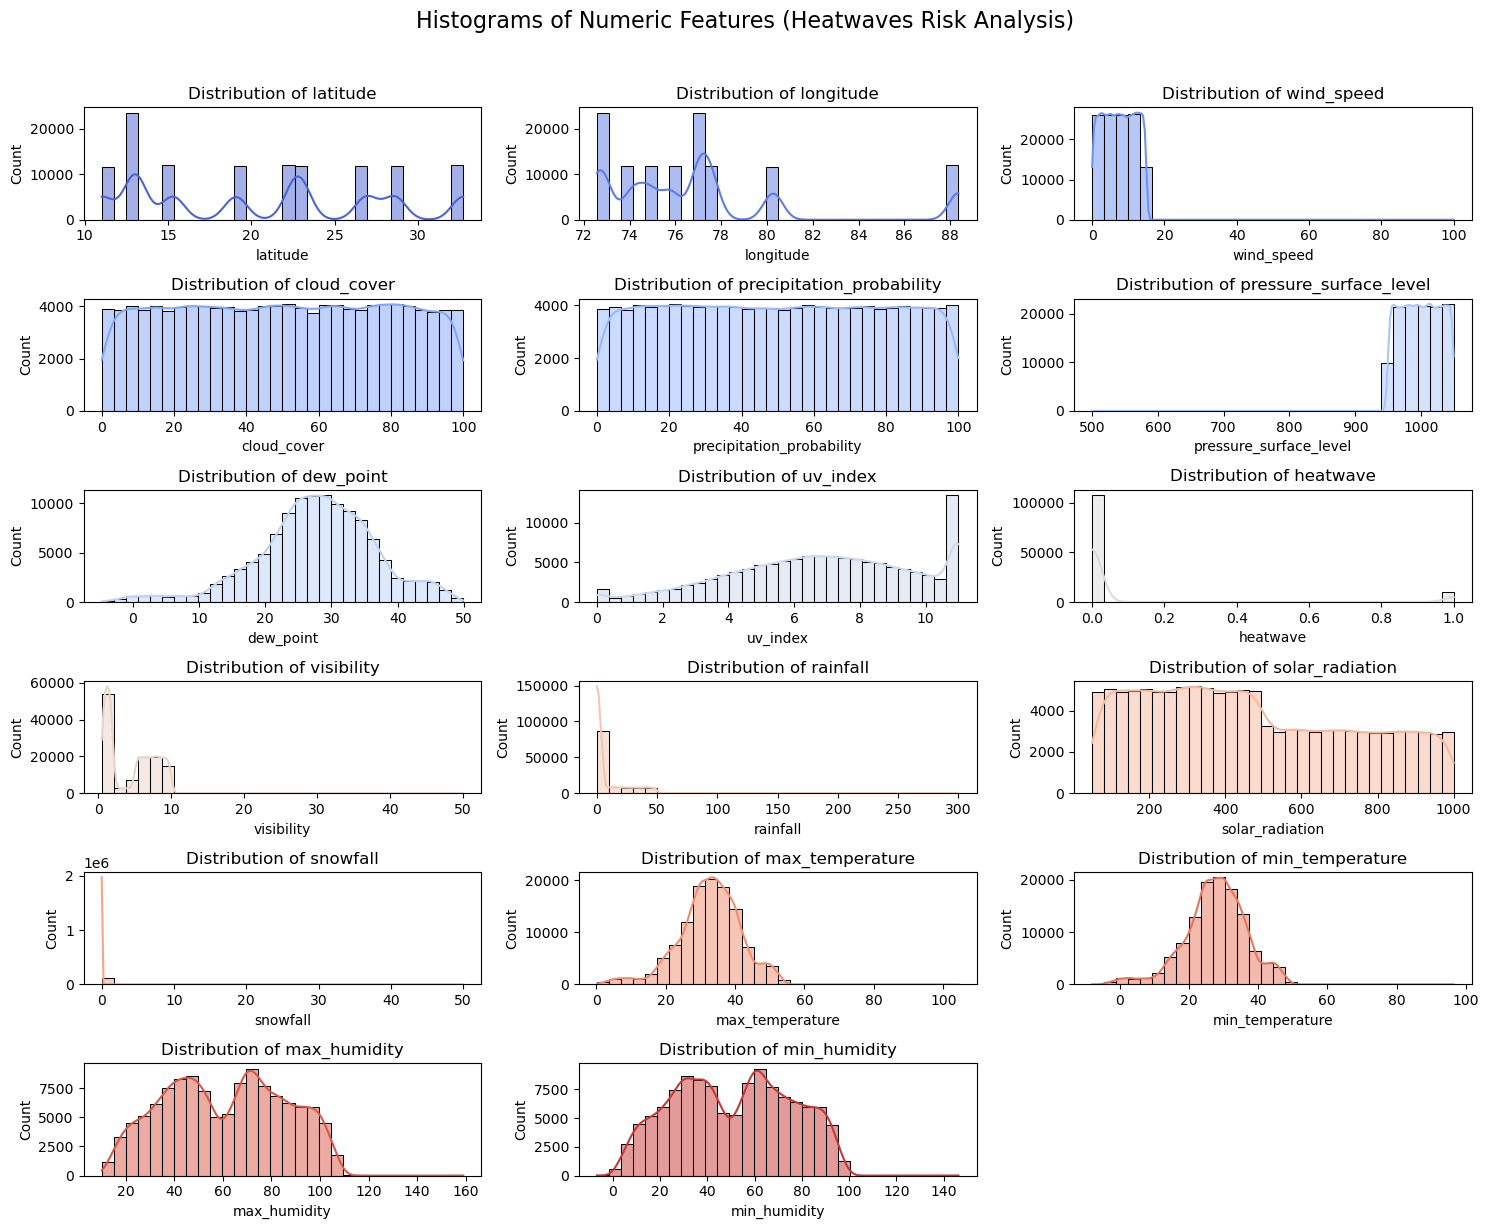

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get numerical columns
num_cols = df2.select_dtypes(include=["int64", "float64"]).columns
print("Numeric columns:", num_cols.tolist())

# 2. Choose a color palette (heatwave-friendly shades)
colors = sns.color_palette("coolwarm", len(num_cols))

# 3. Plot histograms for numeric columns
fig, axes = plt.subplots(
    nrows=len(num_cols)//3 + 1,  
    ncols=3,                     
    figsize=(15, 12)
)

axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.histplot(df2[col].dropna(), bins=30, kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title for Heatwaves Risk
fig.suptitle("Histograms of Numeric Features (Heatwaves Risk Analysis)", fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


 Using target column: heatwave


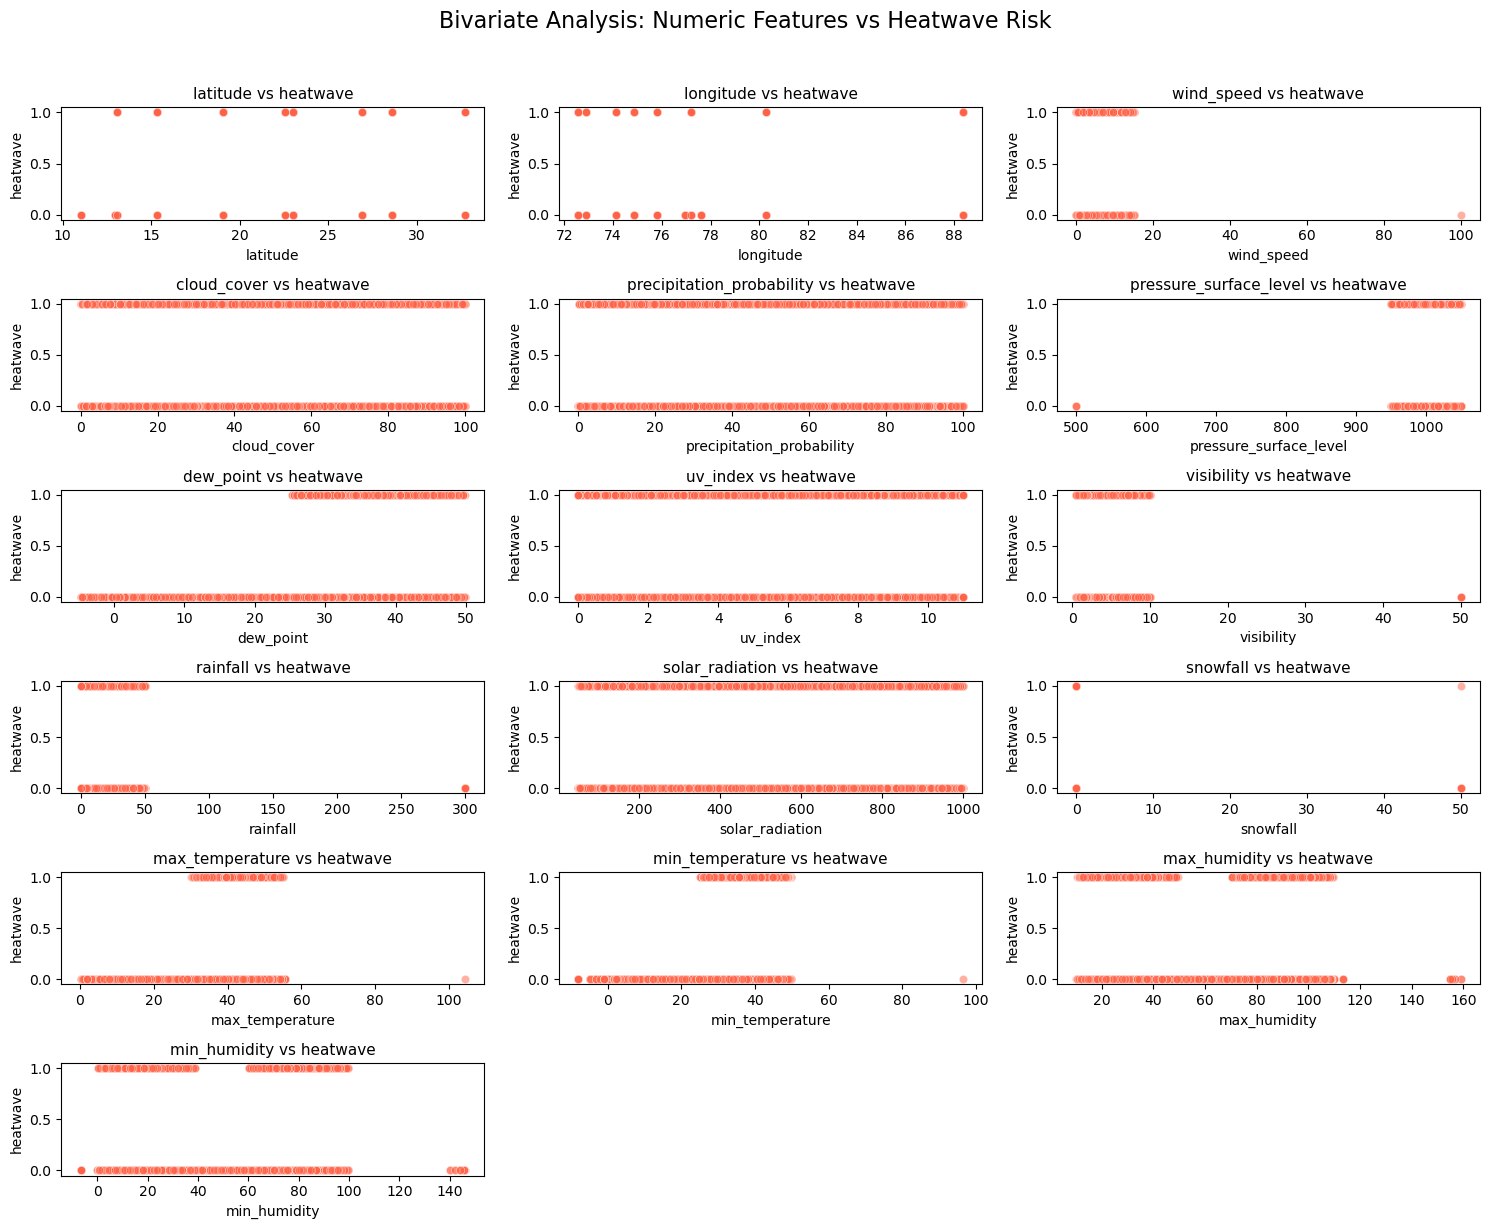

In [33]:
#Bivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# ---- Detect target column automatically ----
possible_targets = [col for col in df2.columns if "heatwave" in col.lower() or "risk" in col.lower()]
if len(possible_targets) == 0:
    raise ValueError(" No Heatwave-related column found. Please check df2.columns")
else:
    target = possible_targets[0]   # pick the first matching column
    print(" Using target column:", target)

# ---- 1. Numerical features vs Target ----
num_cols = df2.select_dtypes(include=["int64", "float64"]).columns.drop(target, errors="ignore")

fig, axes = plt.subplots(
    nrows=len(num_cols)//3 + 1,
    ncols=3,
    figsize=(15, 12)
)

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.scatterplot(
        x=df2[col], 
        y=df2[target], 
        alpha=0.5, 
        ax=axes[i], 
        color="tomato"
    )
    axes[i].set_title(f"{col} vs {target}", fontsize=11)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Bivariate Analysis: Numeric Features vs Heatwave Risk", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


 Using target column: heatwave


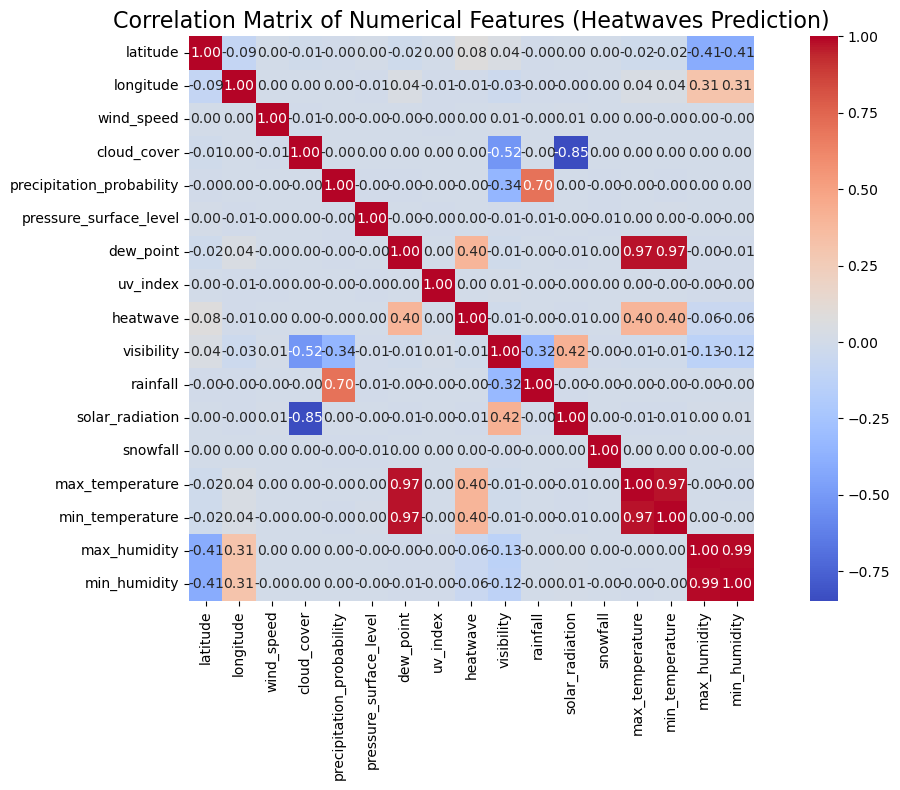

In [34]:
#Correlation Matrix of Numerical Features 

import matplotlib.pyplot as plt
import seaborn as sns

#Detect target column automatically
possible_targets = [col for col in df2.columns if "heatwave" in col.lower() or "risk" in col.lower()]
if len(possible_targets) == 0:
    raise ValueError(" No Heatwave-related column found. Please check df2.columns")
else:
    target = possible_targets[0]
    print(" Using target column:", target)

#Select numerical features
num_cols = df2.select_dtypes(include=["int64", "float64"]).columns

#Correlation matrix
corr = df2[num_cols].corr()

#Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix of Numerical Features (Heatwaves Prediction)", fontsize=16)
plt.tight_layout()
plt.show()


✅ Data Shapes:
X_train: (104844, 16)
X_test : (26211, 16)

📊 Model Performance
Accuracy: 0.9406
F1 Score: 0.8076

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21551
           1       0.95      0.70      0.81      4660

    accuracy                           0.94     26211
   macro avg       0.95      0.85      0.89     26211
weighted avg       0.94      0.94      0.94     26211


🔥 Top 10 Features influencing Heatwave Risk:


,Feature,Importance
12,max_temperature,0.124359
13,min_temperature,0.120211
6,dew_point,0.116045
15,min_humidity,0.099367
14,max_humidity,0.094553
5,pressure_surface_level,0.052392
8,visibility,0.052166
2,wind_speed,0.052033
4,precipitation_probability,0.050947
10,solar_radiation,0.050827


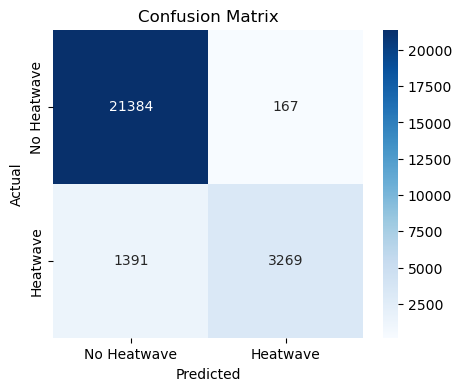

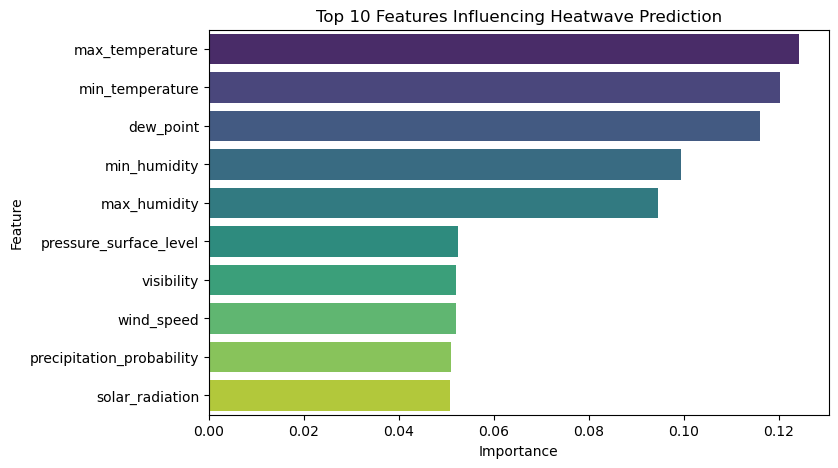

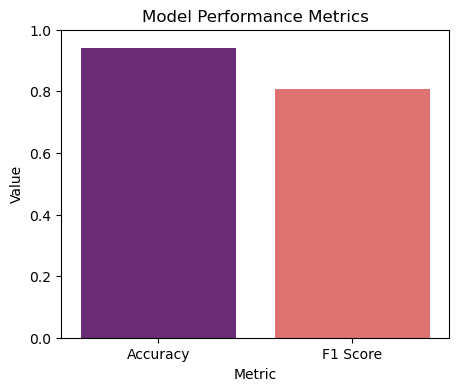

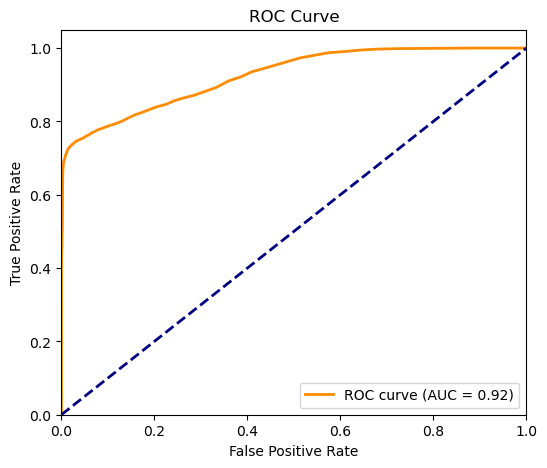

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_curve, auc
)
from IPython.display import display

# 1. Convert boolean → int (if any)
for col in df2.select_dtypes(include=['bool']).columns:
    df2[col] = df2[col].astype(int)

# 2. Handle missing values
df2 = df2.fillna(df2.mean(numeric_only=True))

# 3. Target column
target = "heatwave"

# 4. Features & target split
X = df2.drop(columns=[target])
y = (df2[target] > 0).astype(int)   # binary target

# 5. Keep only numeric features
X = X.select_dtypes(include=[np.number])

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

# 7. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# 9. Predictions & evaluation
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]  # probabilities for ROC/AUC

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 Model Performance")
print("Accuracy:", round(accuracy, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10. Feature importance
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n🔥 Top 10 Features influencing Heatwave Risk:")
display(importances.head(10))

# ------------------- 📈 PLOTS -------------------

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["No Heatwave","Heatwave"],
            yticklabels=["No Heatwave","Heatwave"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Plot (✅ fixed warnings)
plt.figure(figsize=(8,5))
sns.barplot(
    data=importances.head(10),
    x="Importance", y="Feature",
    hue="Feature", palette="viridis", legend=False
)
plt.title("Top 10 Features Influencing Heatwave Prediction")
plt.show()

# Accuracy vs F1 Score (✅ fixed warnings)
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "F1 Score"],
    "Value": [accuracy, f1]
})
plt.figure(figsize=(5,4))
sns.barplot(
    data=metrics_df,
    x="Metric", y="Value",
    hue="Metric", palette="magma", legend=False
)
plt.ylim(0,1)
plt.title("Model Performance Metrics")
plt.show()

# ROC Curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
